In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier


# Classifier Model


In [4]:
svm_model = SVC(kernel='poly', degree=7, C=10)
knn_model = KNeighborsClassifier(n_neighbors=5)

## 10FOLD CV Scenario

In [5]:
def cross_validation(model,X, y):
    # Melakukan 10-Fold Cross Validation
    cv_predictions = cross_val_predict(model, X, y, cv=10)

    # Menghitung confusion matrix
    conf_matrix = confusion_matrix(y, cv_predictions)

    # Calculate TP, TN, FP, FN using NumPy
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    classes = np.unique(y)

    # Calculate Sensitivity, Specificity, and Accuracy for each class
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_scores = f1_score(y, cv_predictions, average=None)

    # Print the results for each class
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", round(sensitivity[i], 2))
        print("Specificity:", round(specificity[i], 2))
        print("Accuracy:", round(accuracy[i], 2))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    avg_sensitivity = round(avg_sensitivity, 2)
    avg_specificity = round(avg_specificity, 2)
    avg_accuracy = round(avg_accuracy, 2)
    avg_f1_score = round(avg_f1_score, 2)


    # Print average values
    print("Average Sensitivity:", avg_sensitivity)
    print("Average Specificity:", avg_specificity)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)

    print("\n")

    # Mencetak nilai Sensitivity, Specificity, dan Accuracy
    print(classification_report(y, cv_predictions))

        # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()


##  75% Train & 25% Test Scenario

In [6]:
def train_test(model, X_test, y_test):
    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, predictions)
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_scores = f1_score(y_test, predictions, average=None)

    # Print the results for each class
    classes = np.unique(y_test)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", round(sensitivity[i], 2))
        print("Specificity:", round(specificity[i], 2))
        print("Accuracy:", round(accuracy[i], 2))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    avg_sensitivity = round(avg_sensitivity, 2)
    avg_specificity = round(avg_specificity, 2)
    avg_accuracy = round(avg_accuracy, 2)
    avg_f1_score = round(avg_f1_score, 2)


    # Print average values
    print("Average Sensitivity:", avg_sensitivity)
    print("Average Specificity:", avg_specificity)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)

    print("\n")

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Membuat heatmap dari confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


## 50% Train, 25% Validation, & 25% Test Scenario

In [7]:
def train_validation_test(model, X_validation, y_validation):
    # Make predictions on the validation data
    predictions = model.predict(X_validation)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_validation, predictions)
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_scores = f1_score(y_validation, predictions, average=None)


    # Print the results for each class
    classes = np.unique(y_validation)
    for i, class_name in enumerate(classes):
        print("Class:", class_name)
        print("Sensitivity:", round(sensitivity[i], 2))
        print("Specificity:", round(specificity[i], 2))
        print("Accuracy:", round(accuracy[i], 2))
        print()

    avg_sensitivity = np.mean(sensitivity)
    avg_specificity = np.mean(specificity)
    avg_accuracy = np.mean(accuracy)
    avg_f1_score = np.mean(f1_scores)

    avg_sensitivity = round(avg_sensitivity, 2)
    avg_specificity = round(avg_specificity, 2)
    avg_accuracy = round(avg_accuracy, 2)
    avg_f1_score = round(avg_f1_score, 2)

    # Print average values
    print("Average Sensitivity:", avg_sensitivity)
    print("Average Specificity:", avg_specificity)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    # print(f1_scores)
    print("\n")

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_validation, predictions))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



# CPA1


In [8]:
file_path1 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPA1-3/CPA1.xlsx'
cpa1 = pd.read_excel(file_path1)
cpa1


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A
...,...,...,...,...,...,...
195,0.444264,0.220282,0.144946,0.106833,0.083676,E
196,0.445045,0.220472,0.144977,0.106466,0.083040,E
197,0.445374,0.220198,0.145034,0.106326,0.083069,E
198,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [9]:
#Check class
jumlah_kelas = cpa1['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpa1['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 2
Jumlah data per kelas:


kelas
A    100
E    100
Name: count, dtype: int64

In [10]:
X = cpa1[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa1['kelas']

## SVM 10FOLD-CV

Class: A
Sensitivity: 0.83
Specificity: 0.8
Accuracy: 0.82

Class: E
Sensitivity: 0.8
Specificity: 0.83
Accuracy: 0.82

Average Sensitivity: 0.82
Average Specificity: 0.82
Average Accuracy: 0.82
Average F1 Score: 0.81


              precision    recall  f1-score   support

           A       0.81      0.83      0.82       100
           E       0.82      0.80      0.81       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



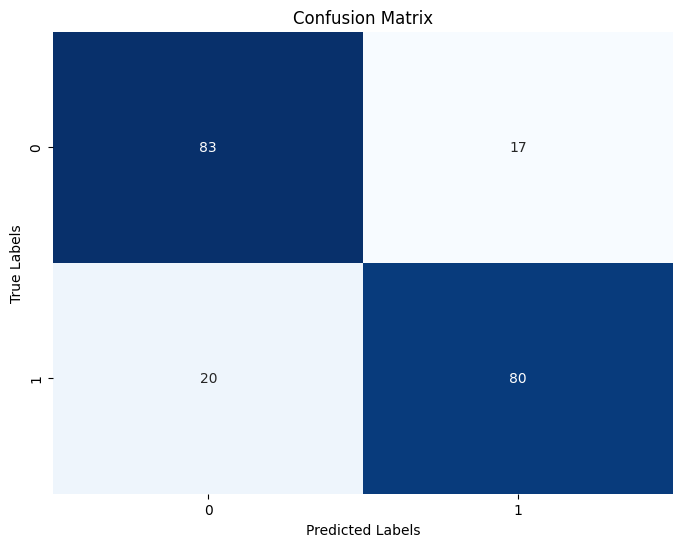

In [11]:
cross_validation(svm_model,X,y)


## SVM 75% Train & 25% Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: A
Sensitivity: 0.81
Specificity: 0.74
Accuracy: 0.78

Class: E
Sensitivity: 0.74
Specificity: 0.81
Accuracy: 0.78

Average Sensitivity: 0.78
Average Specificity: 0.78
Average Accuracy: 0.78
Average F1 Score: 0.78


Classification Report:
              precision    recall  f1-score   support

           A       0.79      0.81      0.80        27
           E       0.77      0.74      0.76        23

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



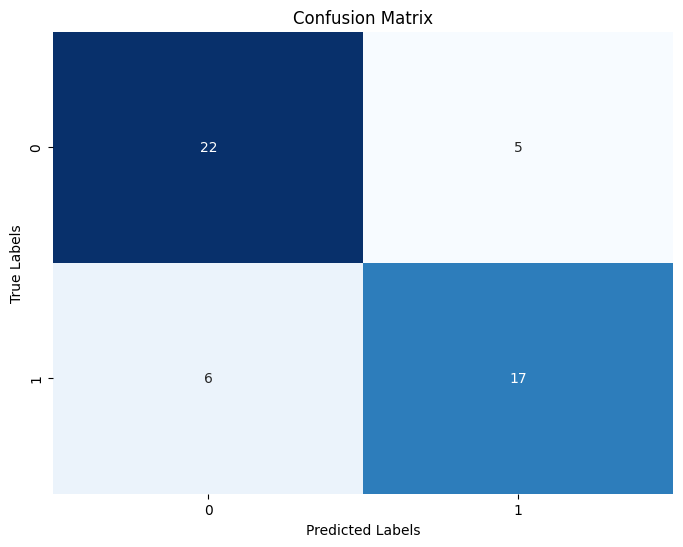

In [13]:
train_test(svm_model, X_test, y_test)

## SVM 50% Train, 25% Validation, & 25% Test




In [14]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: A
Sensitivity: 0.86
Specificity: 0.54
Accuracy: 0.68

Class: E
Sensitivity: 0.54
Specificity: 0.86
Accuracy: 0.68

Average Sensitivity: 0.7
Average Specificity: 0.7
Average Accuracy: 0.68
Average F1 Score: 0.68


Classification Report:
              precision    recall  f1-score   support

           A       0.59      0.86      0.70        22
           E       0.83      0.54      0.65        28

    accuracy                           0.68        50
   macro avg       0.71      0.70      0.68        50
weighted avg       0.73      0.68      0.67        50



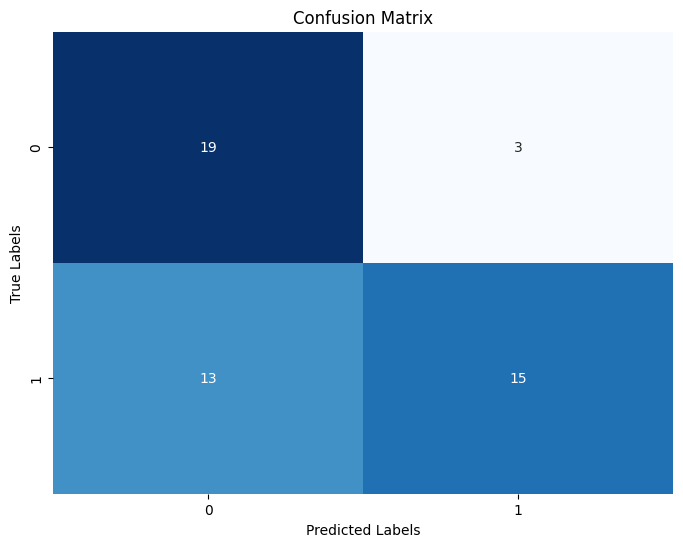

In [15]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: A
Sensitivity: 0.77
Specificity: 0.7
Accuracy: 0.74

Class: E
Sensitivity: 0.7
Specificity: 0.77
Accuracy: 0.74

Average Sensitivity: 0.74
Average Specificity: 0.74
Average Accuracy: 0.74
Average F1 Score: 0.73


              precision    recall  f1-score   support

           A       0.72      0.77      0.74       100
           E       0.75      0.70      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



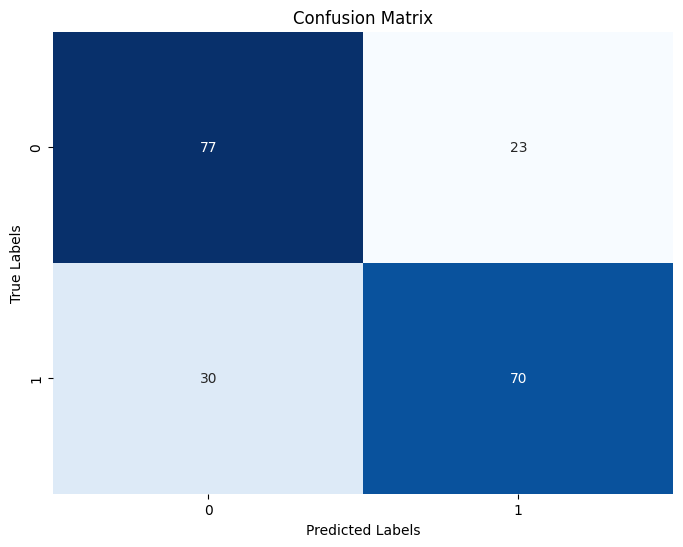

In [16]:
cross_validation(knn_model,X,y)

## KNN 75% Train 25% Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: A
Sensitivity: 0.78
Specificity: 0.74
Accuracy: 0.76

Class: E
Sensitivity: 0.74
Specificity: 0.78
Accuracy: 0.76

Average Sensitivity: 0.76
Average Specificity: 0.76
Average Accuracy: 0.76
Average F1 Score: 0.76


Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.78      0.78        27
           E       0.74      0.74      0.74        23

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



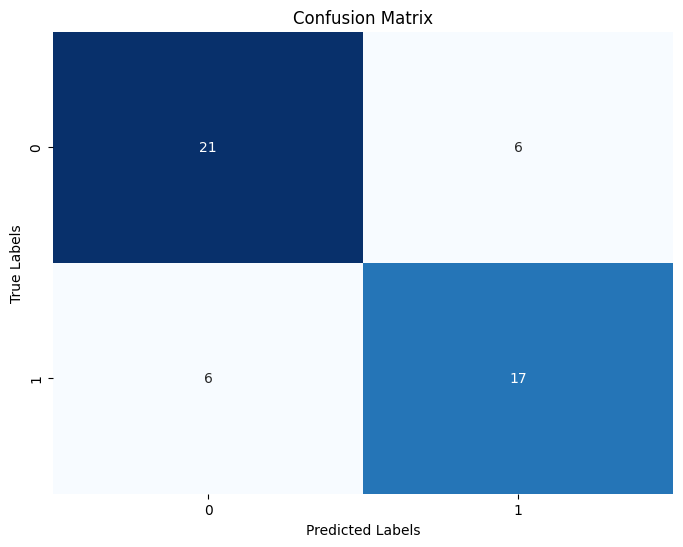

In [18]:
train_test(knn_model, X_test, y_test)

## KNN 50% Train, 25% Validation, 25% Test

In [19]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: A
Sensitivity: 0.68
Specificity: 0.71
Accuracy: 0.7

Class: E
Sensitivity: 0.71
Specificity: 0.68
Accuracy: 0.7

Average Sensitivity: 0.7
Average Specificity: 0.7
Average Accuracy: 0.7
Average F1 Score: 0.7


Classification Report:
              precision    recall  f1-score   support

           A       0.65      0.68      0.67        22
           E       0.74      0.71      0.73        28

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



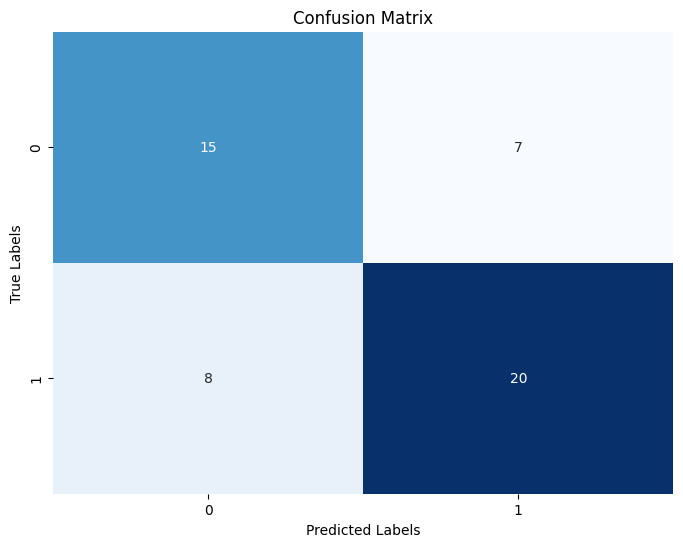

In [20]:
train_validation_test(knn_model, X_validation, y_validation)

# CPA2

In [21]:
file_path2 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPA1-3/CPA2.xlsx'
cpa2 = pd.read_excel(file_path2)
cpa2


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.448457,0.220860,0.143938,0.104903,0.081841,B
1,0.448288,0.221315,0.144335,0.104964,0.081099,B
2,0.448916,0.221049,0.143741,0.105198,0.081096,B
3,0.449600,0.221141,0.144107,0.104930,0.080222,B
4,0.451886,0.221594,0.143987,0.103718,0.078816,B
...,...,...,...,...,...,...
195,0.444264,0.220282,0.144946,0.106833,0.083676,E
196,0.445045,0.220472,0.144977,0.106466,0.083040,E
197,0.445374,0.220198,0.145034,0.106326,0.083069,E
198,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [22]:
#Check class
jumlah_kelas = cpa2['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpa2['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 2
Jumlah data per kelas:


kelas
B    100
E    100
Name: count, dtype: int64

In [23]:
X_cpa2 = cpa2[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpa2 = cpa2['kelas']

## SVM 10FOLD-CV

Class: B
Sensitivity: 0.59
Specificity: 0.76
Accuracy: 0.68

Class: E
Sensitivity: 0.76
Specificity: 0.59
Accuracy: 0.68

Average Sensitivity: 0.68
Average Specificity: 0.68
Average Accuracy: 0.68
Average F1 Score: 0.67


              precision    recall  f1-score   support

           B       0.71      0.59      0.64       100
           E       0.65      0.76      0.70       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200



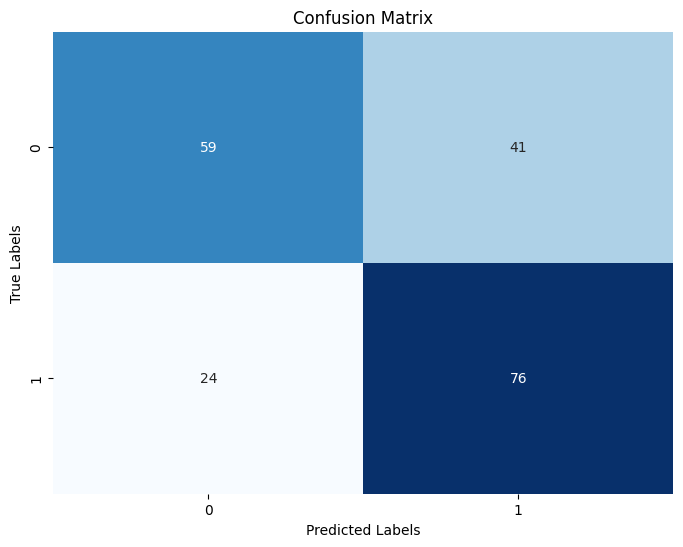

In [24]:
cross_validation(svm_model,X_cpa2,y_cpa2)


## SVM 75% Train & 25% Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_cpa2, y_cpa2, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 150
Jumlah data test: 50


Class: B
Sensitivity: 0.56
Specificity: 1.0
Accuracy: 0.76

Class: E
Sensitivity: 1.0
Specificity: 0.56
Accuracy: 0.76

Average Sensitivity: 0.78
Average Specificity: 0.78
Average Accuracy: 0.76
Average F1 Score: 0.75


Classification Report:
              precision    recall  f1-score   support

           B       1.00      0.56      0.71        27
           E       0.66      1.00      0.79        23

    accuracy                           0.76        50
   macro avg       0.83      0.78      0.75        50
weighted avg       0.84      0.76      0.75        50



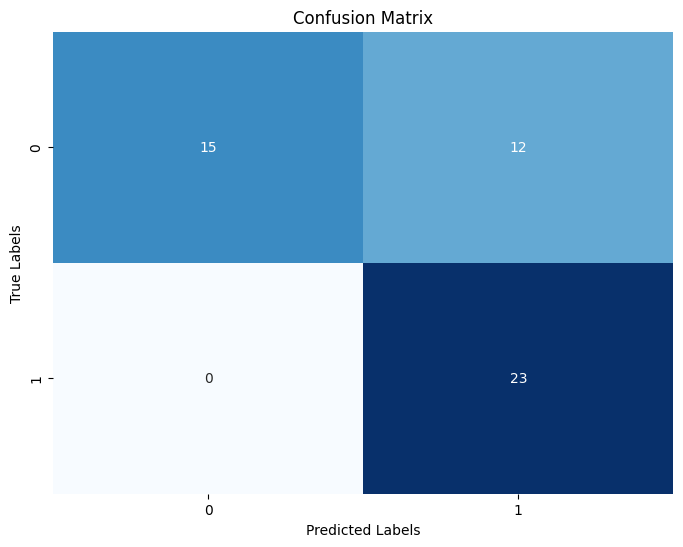

In [26]:
train_test(svm_model, X_test, y_test)

## SVM 50% Train, 25% Validation, & 25% Test




In [27]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpa2, y_cpa2, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: B
Sensitivity: 0.27
Specificity: 0.96
Accuracy: 0.66

Class: E
Sensitivity: 0.96
Specificity: 0.27
Accuracy: 0.66

Average Sensitivity: 0.62
Average Specificity: 0.62
Average Accuracy: 0.66
Average F1 Score: 0.59


Classification Report:
              precision    recall  f1-score   support

           B       0.86      0.27      0.41        22
           E       0.63      0.96      0.76        28

    accuracy                           0.66        50
   macro avg       0.74      0.62      0.59        50
weighted avg       0.73      0.66      0.61        50



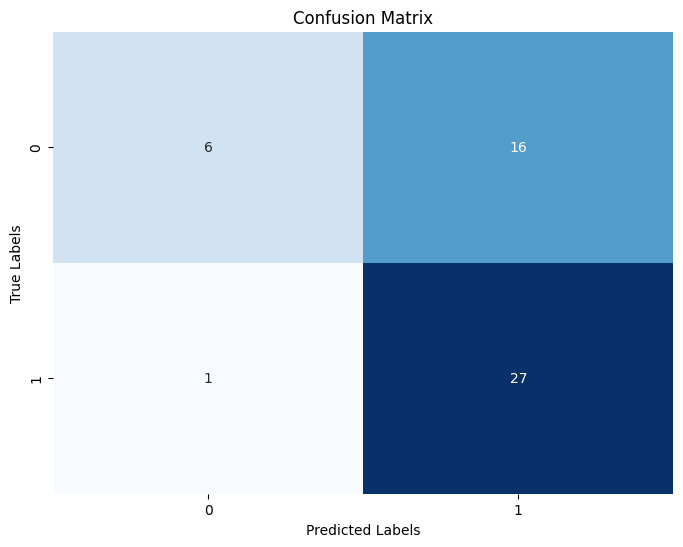

In [28]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: B
Sensitivity: 0.8
Specificity: 0.66
Accuracy: 0.73

Class: E
Sensitivity: 0.66
Specificity: 0.8
Accuracy: 0.73

Average Sensitivity: 0.73
Average Specificity: 0.73
Average Accuracy: 0.73
Average F1 Score: 0.73


              precision    recall  f1-score   support

           B       0.70      0.80      0.75       100
           E       0.77      0.66      0.71       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



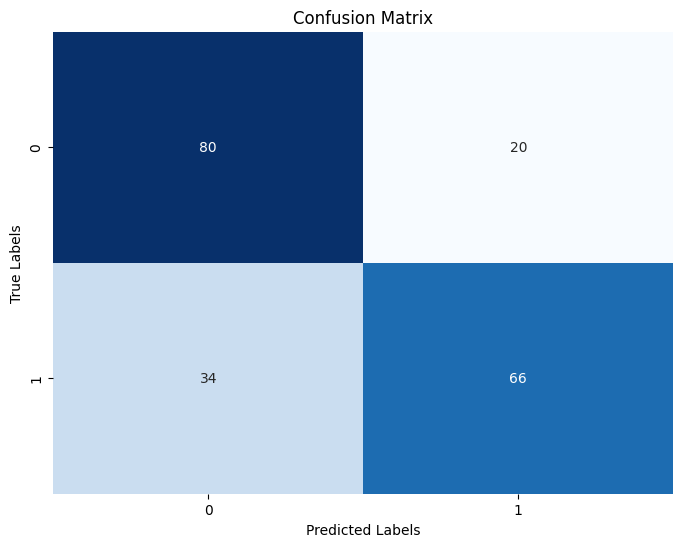

In [29]:
cross_validation(knn_model,X_cpa2,y_cpa2)


## KNN 75% Train & 25% Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_cpa2, y_cpa2, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 150
Jumlah data test: 50


Class: B
Sensitivity: 0.81
Specificity: 0.83
Accuracy: 0.82

Class: E
Sensitivity: 0.83
Specificity: 0.81
Accuracy: 0.82

Average Sensitivity: 0.82
Average Specificity: 0.82
Average Accuracy: 0.82
Average F1 Score: 0.82


Classification Report:
              precision    recall  f1-score   support

           B       0.85      0.81      0.83        27
           E       0.79      0.83      0.81        23

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



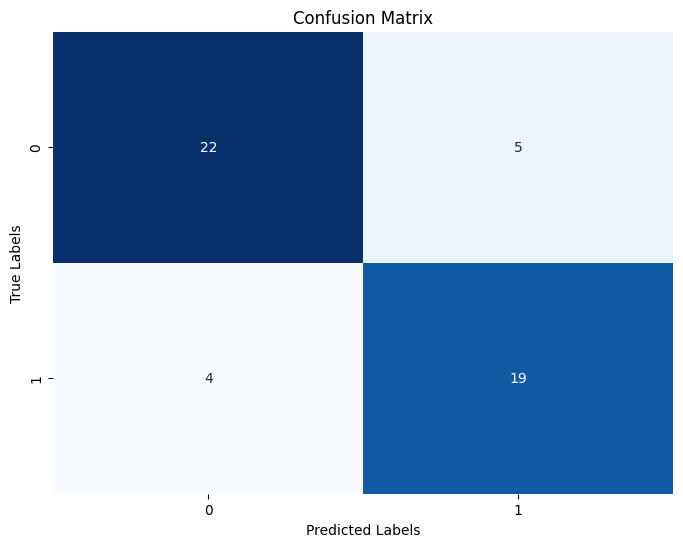

In [31]:
train_test(knn_model, X_test, y_test)

## KNN 50% Train, 25% Validation, & 25% Test




In [32]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpa2, y_cpa2, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 100
Jumlah data test: 50
Jumlah data validation: 50


Class: B
Sensitivity: 0.5
Specificity: 0.93
Accuracy: 0.74

Class: E
Sensitivity: 0.93
Specificity: 0.5
Accuracy: 0.74

Average Sensitivity: 0.71
Average Specificity: 0.71
Average Accuracy: 0.74
Average F1 Score: 0.71


Classification Report:
              precision    recall  f1-score   support

           B       0.85      0.50      0.63        22
           E       0.70      0.93      0.80        28

    accuracy                           0.74        50
   macro avg       0.77      0.71      0.71        50
weighted avg       0.77      0.74      0.72        50



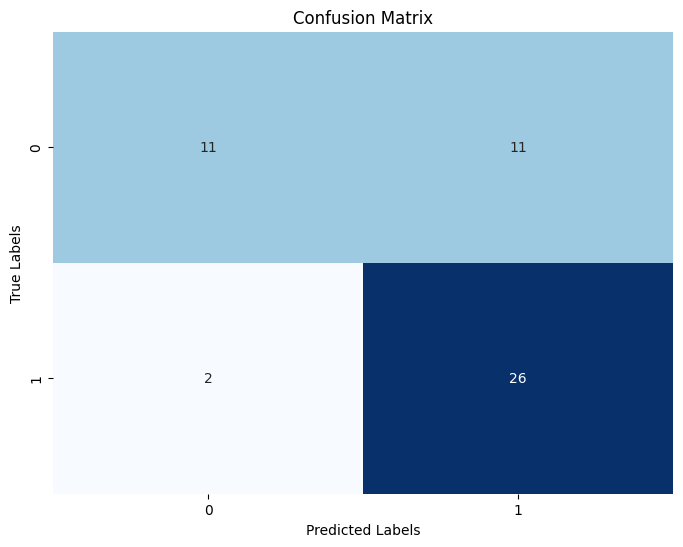

In [33]:
train_validation_test(knn_model, X_validation, y_validation)

# CPA3

In [34]:
file_path3 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPA1-3/CPA3.xlsx'
cpa3 = pd.read_excel(file_path3)
cpa3


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A
...,...,...,...,...,...,...
295,0.444264,0.220282,0.144946,0.106833,0.083676,E
296,0.445045,0.220472,0.144977,0.106466,0.083040,E
297,0.445374,0.220198,0.145034,0.106326,0.083069,E
298,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [35]:
#Check class
jumlah_kelas = cpa3['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpa3['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 2
Jumlah data per kelas:


kelas
A    200
E    100
Name: count, dtype: int64

In [36]:
X_cpa3 = cpa3[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpa3 = cpa3['kelas']

## SVM 10FOLD-CV

Class: A
Sensitivity: 0.87
Specificity: 0.31
Accuracy: 0.68

Class: E
Sensitivity: 0.31
Specificity: 0.87
Accuracy: 0.68

Average Sensitivity: 0.59
Average Specificity: 0.59
Average Accuracy: 0.68
Average F1 Score: 0.59


              precision    recall  f1-score   support

           A       0.72      0.87      0.79       200
           E       0.54      0.31      0.39       100

    accuracy                           0.68       300
   macro avg       0.63      0.59      0.59       300
weighted avg       0.66      0.68      0.66       300



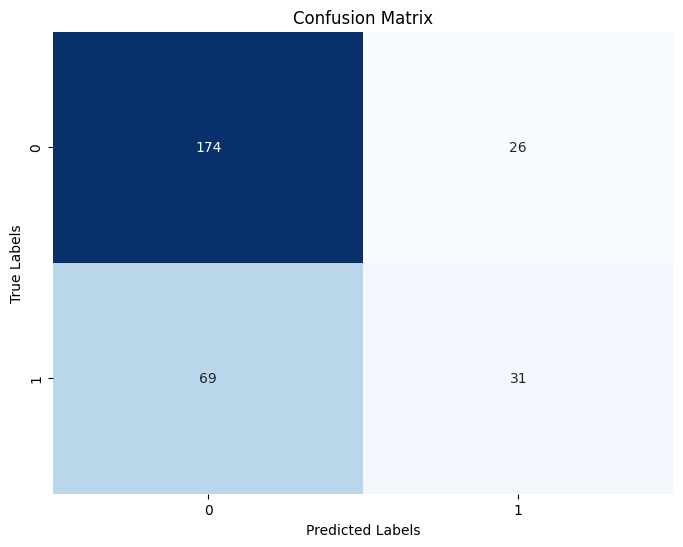

In [37]:
cross_validation(svm_model,X_cpa3,y_cpa3)

## SVM 75% TRAIN, 25% TEST

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_cpa3, y_cpa3, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.96
Specificity: 0.24
Accuracy: 0.72

Class: E
Sensitivity: 0.24
Specificity: 0.96
Accuracy: 0.72

Average Sensitivity: 0.6
Average Specificity: 0.6
Average Accuracy: 0.72
Average F1 Score: 0.59


Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.96      0.82        50
           E       0.75      0.24      0.36        25

    accuracy                           0.72        75
   macro avg       0.73      0.60      0.59        75
weighted avg       0.73      0.72      0.67        75



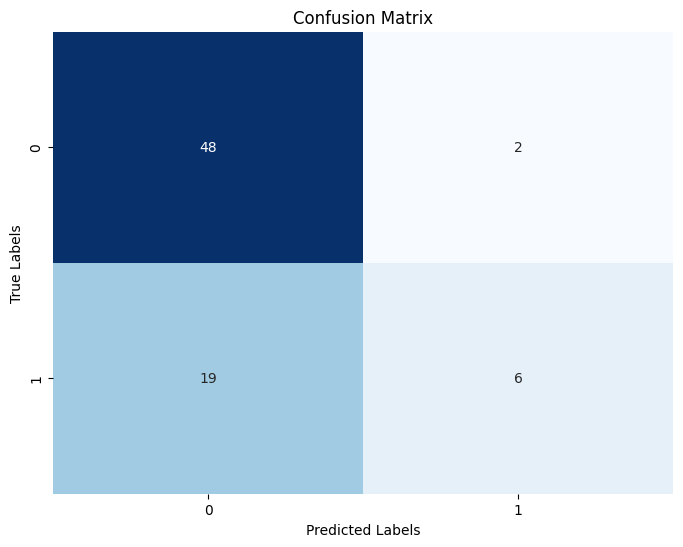

In [39]:
train_test(svm_model, X_test, y_test)

## SVM 50% TRAIN, 25% VALIDATION, 25% TEST

In [40]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpa3, y_cpa3, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.74
Specificity: 0.76
Accuracy: 0.75

Class: E
Sensitivity: 0.76
Specificity: 0.74
Accuracy: 0.75

Average Sensitivity: 0.75
Average Specificity: 0.75
Average Accuracy: 0.75
Average F1 Score: 0.72


Classification Report:
              precision    recall  f1-score   support

           A       0.89      0.74      0.81        54
           E       0.53      0.76      0.63        21

    accuracy                           0.75        75
   macro avg       0.71      0.75      0.72        75
weighted avg       0.79      0.75      0.76        75



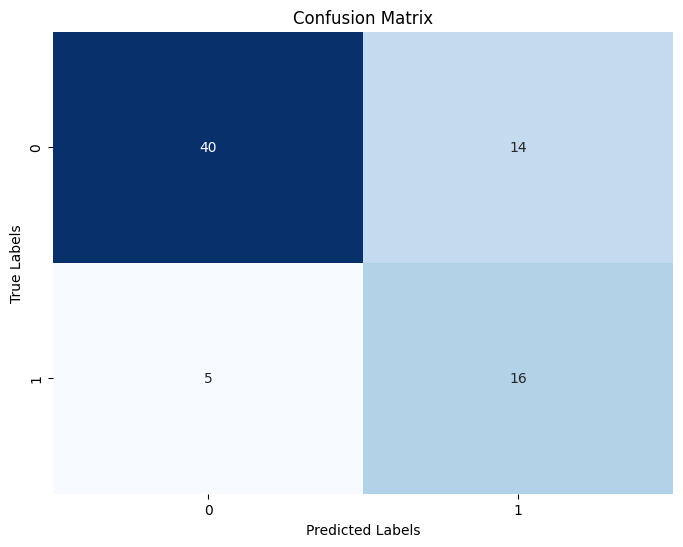

In [41]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: A
Sensitivity: 0.86
Specificity: 0.54
Accuracy: 0.75

Class: E
Sensitivity: 0.54
Specificity: 0.86
Accuracy: 0.75

Average Sensitivity: 0.7
Average Specificity: 0.7
Average Accuracy: 0.75
Average F1 Score: 0.71


              precision    recall  f1-score   support

           A       0.79      0.86      0.82       200
           E       0.66      0.54      0.59       100

    accuracy                           0.75       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.75      0.75      0.75       300



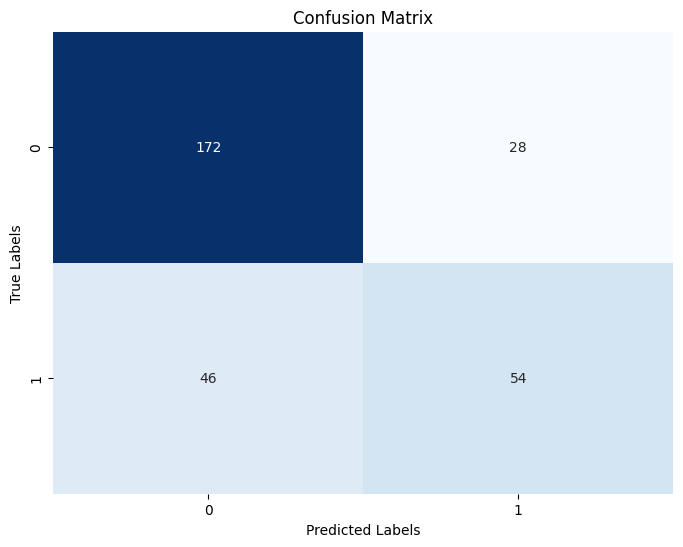

In [42]:
cross_validation(knn_model,X_cpa3,y_cpa3)

## KNN 75% TRAIN 25% TEST

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_cpa3, y_cpa3, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.9
Specificity: 0.52
Accuracy: 0.77

Class: E
Sensitivity: 0.52
Specificity: 0.9
Accuracy: 0.77

Average Sensitivity: 0.71
Average Specificity: 0.71
Average Accuracy: 0.77
Average F1 Score: 0.72


Classification Report:
              precision    recall  f1-score   support

           A       0.79      0.90      0.84        50
           E       0.72      0.52      0.60        25

    accuracy                           0.77        75
   macro avg       0.76      0.71      0.72        75
weighted avg       0.77      0.77      0.76        75



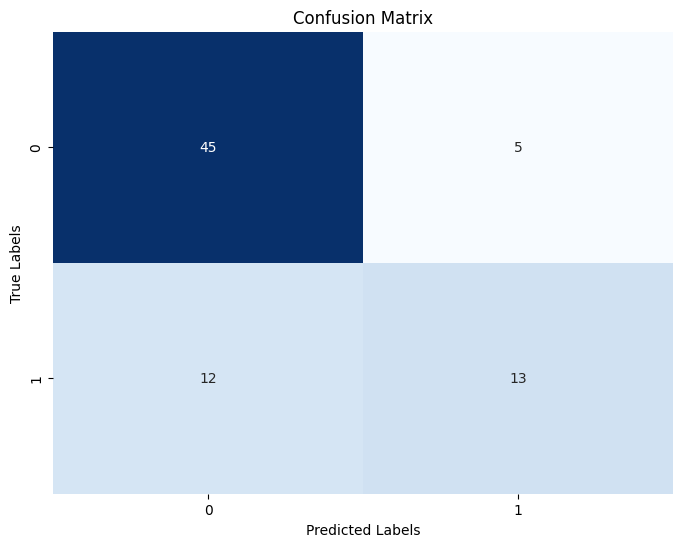

In [44]:
train_test(knn_model, X_test, y_test)

## KNN 50% TRAIN, 25% VALIDATION, 25% TEST





In [45]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpa3, y_cpa3, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.89
Specificity: 0.43
Accuracy: 0.76

Class: E
Sensitivity: 0.43
Specificity: 0.89
Accuracy: 0.76

Average Sensitivity: 0.66
Average Specificity: 0.66
Average Accuracy: 0.76
Average F1 Score: 0.67


Classification Report:
              precision    recall  f1-score   support

           A       0.80      0.89      0.84        54
           E       0.60      0.43      0.50        21

    accuracy                           0.76        75
   macro avg       0.70      0.66      0.67        75
weighted avg       0.74      0.76      0.75        75



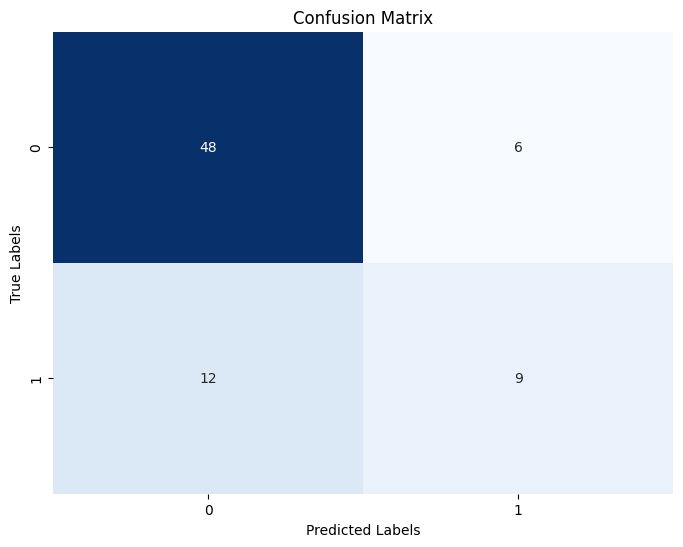

In [46]:
train_validation_test(knn_model, X_validation, y_validation)

# CPC1

In [47]:
file_cpc1 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPC1-5/CPC1.xlsx'
cpc1 = pd.read_excel(file_cpc1)
cpc1


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A
...,...,...,...,...,...,...
295,0.444264,0.220282,0.144946,0.106833,0.083676,E
296,0.445045,0.220472,0.144977,0.106466,0.083040,E
297,0.445374,0.220198,0.145034,0.106326,0.083069,E
298,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [48]:
#Check class
jumlah_kelas = cpc1['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpc1['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 3
Jumlah data per kelas:


kelas
A    100
C    100
E    100
Name: count, dtype: int64

In [49]:
X_cpc1 = cpc1[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpc1 = cpc1['kelas']

## SVM 10FOLD-CV

Class: A
Sensitivity: 0.65
Specificity: 0.9
Accuracy: 0.82

Class: C
Sensitivity: 0.91
Specificity: 0.84
Accuracy: 0.86

Class: E
Sensitivity: 0.73
Specificity: 0.91
Accuracy: 0.85

Average Sensitivity: 0.76
Average Specificity: 0.88
Average Accuracy: 0.84
Average F1 Score: 0.76


              precision    recall  f1-score   support

           A       0.76      0.65      0.70       100
           C       0.73      0.91      0.81       100
           E       0.80      0.73      0.76       100

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



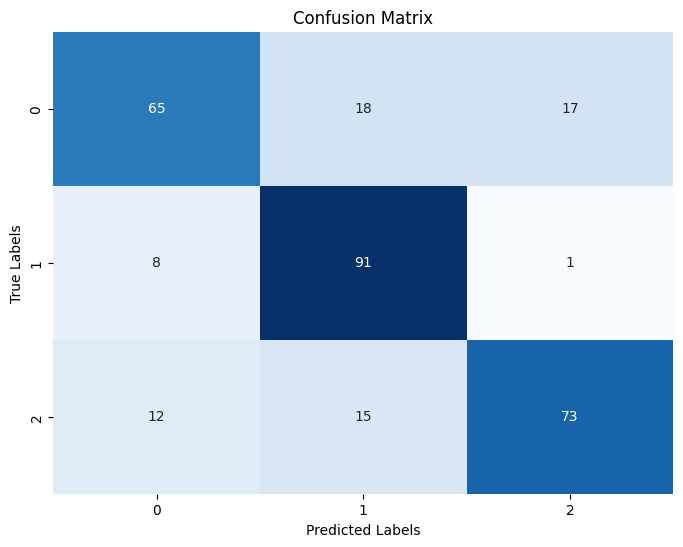

In [50]:
cross_validation(svm_model,X_cpc1,y_cpc1)

## SVM 75% TRAIN, 25% TEST

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc1, y_cpc1, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.59
Specificity: 0.94
Accuracy: 0.81

Class: C
Sensitivity: 0.96
Specificity: 0.87
Accuracy: 0.89

Class: E
Sensitivity: 0.8
Specificity: 0.86
Accuracy: 0.84

Average Sensitivity: 0.78
Average Specificity: 0.89
Average Accuracy: 0.85
Average F1 Score: 0.77


Classification Report:
              precision    recall  f1-score   support

           A       0.84      0.59      0.70        27
           C       0.76      0.96      0.85        23
           E       0.74      0.80      0.77        25

    accuracy                           0.77        75
   macro avg       0.78      0.78      0.77        75
weighted avg       0.78      0.77      0.77        75



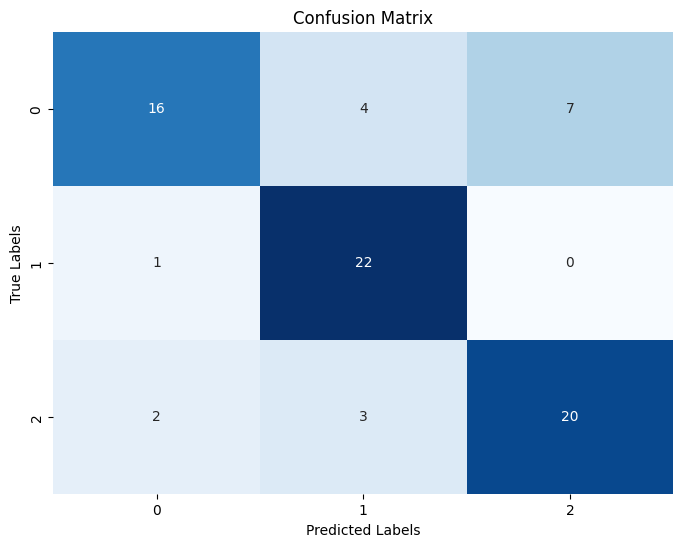

In [52]:
train_test(svm_model, X_test, y_test)

## SVM 50% TRAIN, 25% VALIDATION, 25% TEST

In [53]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc1, y_cpc1, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.68
Specificity: 0.94
Accuracy: 0.84

Class: C
Sensitivity: 0.96
Specificity: 0.8
Accuracy: 0.85

Class: E
Sensitivity: 0.71
Specificity: 0.94
Accuracy: 0.88

Average Sensitivity: 0.78
Average Specificity: 0.89
Average Accuracy: 0.86
Average F1 Score: 0.78


Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.68      0.76        28
           C       0.71      0.96      0.82        26
           E       0.83      0.71      0.77        21

    accuracy                           0.79        75
   macro avg       0.80      0.78      0.78        75
weighted avg       0.80      0.79      0.78        75



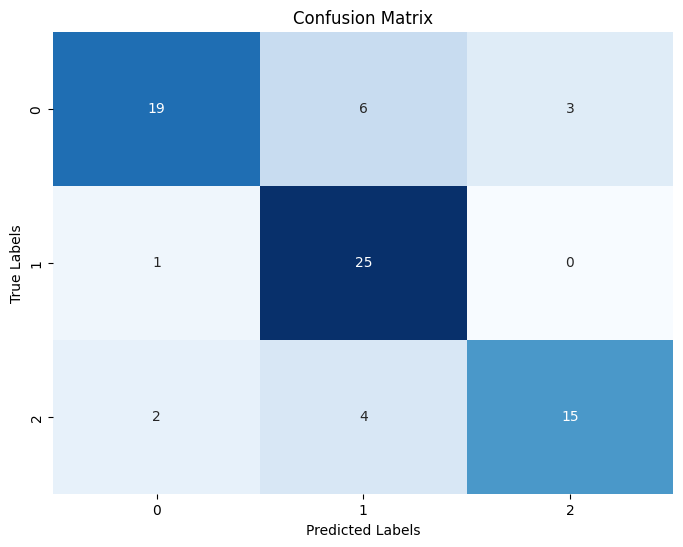

In [54]:
train_validation_test(svm_model, X_validation, y_validation)

##KNN 10FOLD-CV

Class: A
Sensitivity: 0.69
Specificity: 0.8
Accuracy: 0.77

Class: C
Sensitivity: 0.85
Specificity: 0.9
Accuracy: 0.88

Class: E
Sensitivity: 0.64
Specificity: 0.88
Accuracy: 0.8

Average Sensitivity: 0.73
Average Specificity: 0.86
Average Accuracy: 0.82
Average F1 Score: 0.73


              precision    recall  f1-score   support

           A       0.64      0.69      0.66       100
           C       0.81      0.85      0.83       100
           E       0.74      0.64      0.68       100

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



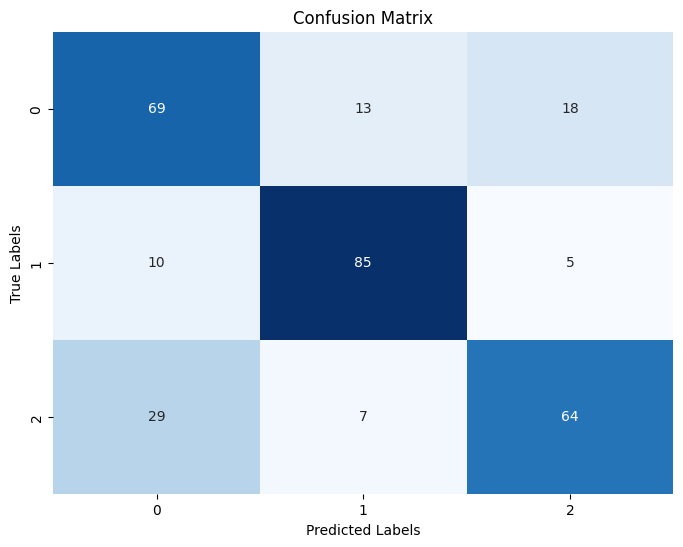

In [55]:
cross_validation(knn_model,X_cpc1,y_cpc1)

## KNN 75% TRAIN, 25% TEST

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc1, y_cpc1, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.78
Specificity: 0.77
Accuracy: 0.77

Class: C
Sensitivity: 0.78
Specificity: 0.87
Accuracy: 0.84

Class: E
Sensitivity: 0.56
Specificity: 0.92
Accuracy: 0.8

Average Sensitivity: 0.71
Average Specificity: 0.85
Average Accuracy: 0.8
Average F1 Score: 0.7


Classification Report:
              precision    recall  f1-score   support

           A       0.66      0.78      0.71        27
           C       0.72      0.78      0.75        23
           E       0.78      0.56      0.65        25

    accuracy                           0.71        75
   macro avg       0.72      0.71      0.70        75
weighted avg       0.72      0.71      0.70        75



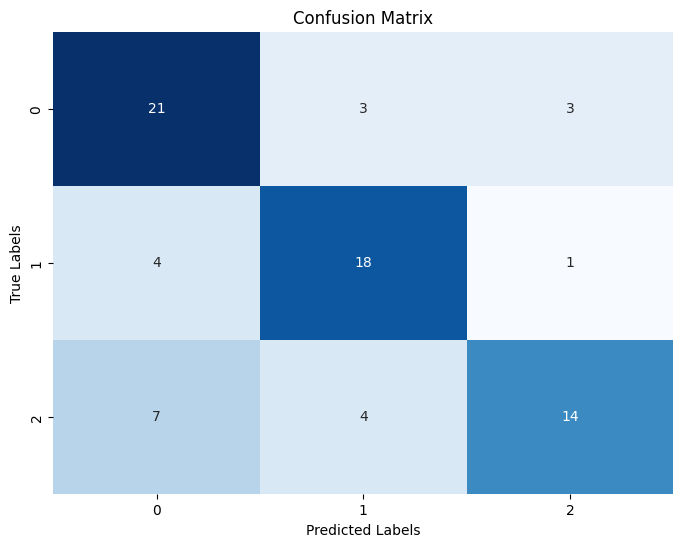

In [57]:
train_test(knn_model, X_test, y_test)

## KNN 50% TRAIN, 25% VALIDATION, 25% TEST

In [58]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc1, y_cpc1, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.57
Specificity: 0.79
Accuracy: 0.71

Class: C
Sensitivity: 0.96
Specificity: 0.8
Accuracy: 0.85

Class: E
Sensitivity: 0.38
Specificity: 0.89
Accuracy: 0.75

Average Sensitivity: 0.64
Average Specificity: 0.82
Average Accuracy: 0.77
Average F1 Score: 0.62


Classification Report:
              precision    recall  f1-score   support

           A       0.62      0.57      0.59        28
           C       0.71      0.96      0.82        26
           E       0.57      0.38      0.46        21

    accuracy                           0.65        75
   macro avg       0.63      0.64      0.62        75
weighted avg       0.64      0.65      0.63        75



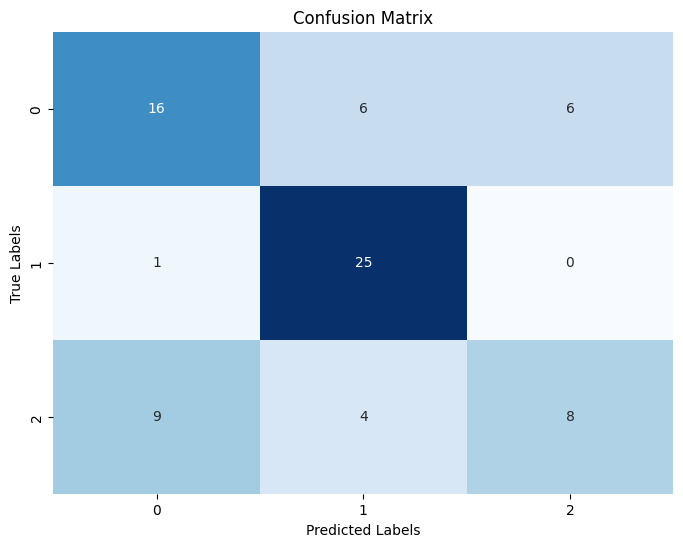

In [59]:
train_validation_test(knn_model, X_validation, y_validation)

#CPC2

In [60]:
file_cpc2 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPC1-5/CPC2.xlsx'
cpc2 = pd.read_excel(file_cpc2)
cpc2


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A
...,...,...,...,...,...,...
295,0.444264,0.220282,0.144946,0.106833,0.083676,E
296,0.445045,0.220472,0.144977,0.106466,0.083040,E
297,0.445374,0.220198,0.145034,0.106326,0.083069,E
298,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [61]:
#Check class
jumlah_kelas = cpc2['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpc2['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 3
Jumlah data per kelas:


kelas
A    100
D    100
E    100
Name: count, dtype: int64

In [62]:
X_cpc2 = cpc2[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpc2 = cpc2['kelas']

## SVM 10FOLD-CV

Class: A
Sensitivity: 0.65
Specificity: 0.89
Accuracy: 0.81

Class: D
Sensitivity: 0.85
Specificity: 0.84
Accuracy: 0.84

Class: E
Sensitivity: 0.71
Specificity: 0.88
Accuracy: 0.82

Average Sensitivity: 0.74
Average Specificity: 0.87
Average Accuracy: 0.82
Average F1 Score: 0.73


              precision    recall  f1-score   support

           A       0.75      0.65      0.70       100
           D       0.72      0.85      0.78       100
           E       0.75      0.71      0.73       100

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.73       300
weighted avg       0.74      0.74      0.73       300



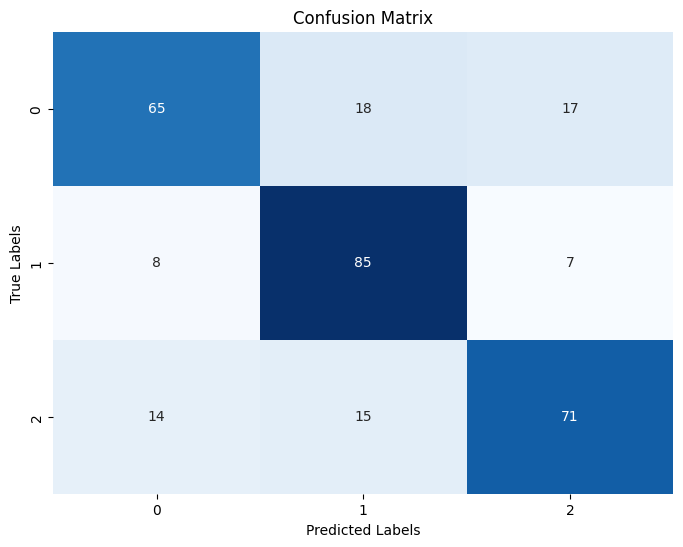

In [63]:
cross_validation(svm_model,X_cpc2,y_cpc2)

## SVM 75% TRAIN, 25% TEST

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc2, y_cpc2, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))



Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.63
Specificity: 0.92
Accuracy: 0.81

Class: D
Sensitivity: 0.91
Specificity: 0.85
Accuracy: 0.87

Class: E
Sensitivity: 0.76
Specificity: 0.88
Accuracy: 0.84

Average Sensitivity: 0.77
Average Specificity: 0.88
Average Accuracy: 0.84
Average F1 Score: 0.76


Classification Report:
              precision    recall  f1-score   support

           A       0.81      0.63      0.71        27
           D       0.72      0.91      0.81        23
           E       0.76      0.76      0.76        25

    accuracy                           0.76        75
   macro avg       0.76      0.77      0.76        75
weighted avg       0.77      0.76      0.76        75



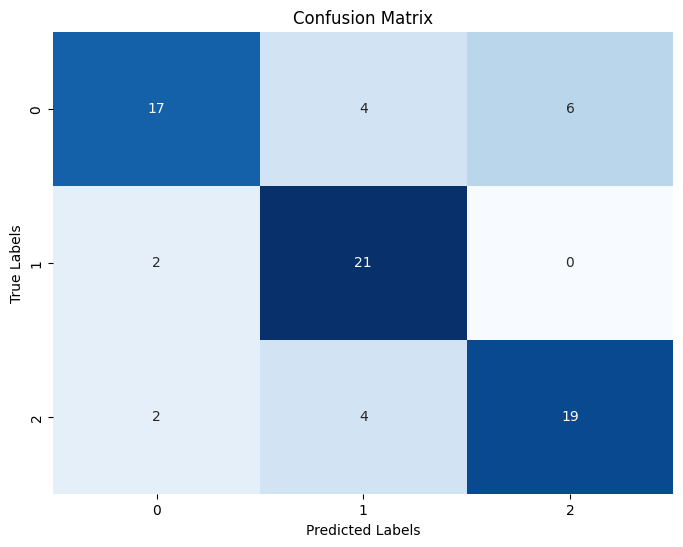

In [65]:
train_test(svm_model, X_test, y_test)

## SVM 50% TRAIN, 25% VALIDATION, 25% TEST


In [66]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc2, y_cpc2, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.68
Specificity: 0.94
Accuracy: 0.84

Class: D
Sensitivity: 0.96
Specificity: 0.78
Accuracy: 0.84

Class: E
Sensitivity: 0.67
Specificity: 0.94
Accuracy: 0.87

Average Sensitivity: 0.77
Average Specificity: 0.89
Average Accuracy: 0.85
Average F1 Score: 0.77


Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.68      0.76        28
           D       0.69      0.96      0.81        26
           E       0.82      0.67      0.74        21

    accuracy                           0.77        75
   macro avg       0.79      0.77      0.77        75
weighted avg       0.79      0.77      0.77        75



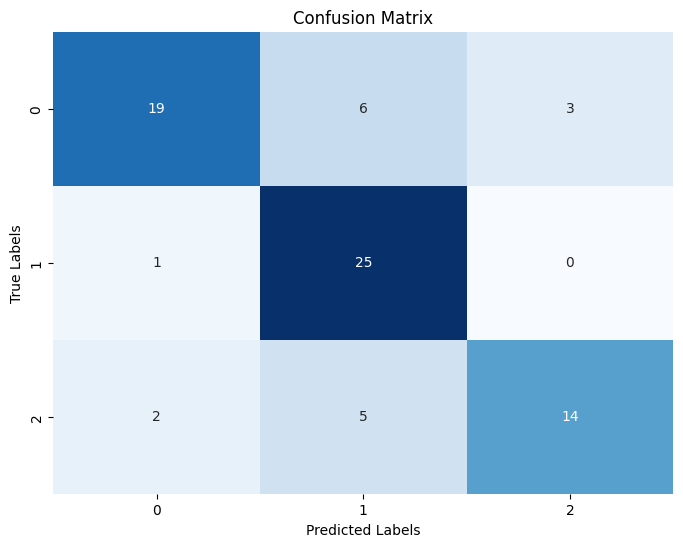

In [67]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: A
Sensitivity: 0.7
Specificity: 0.8
Accuracy: 0.77

Class: D
Sensitivity: 0.83
Specificity: 0.86
Accuracy: 0.85

Class: E
Sensitivity: 0.54
Specificity: 0.88
Accuracy: 0.76

Average Sensitivity: 0.69
Average Specificity: 0.85
Average Accuracy: 0.79
Average F1 Score: 0.69


              precision    recall  f1-score   support

           A       0.64      0.70      0.67       100
           D       0.74      0.83      0.78       100
           E       0.68      0.54      0.60       100

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



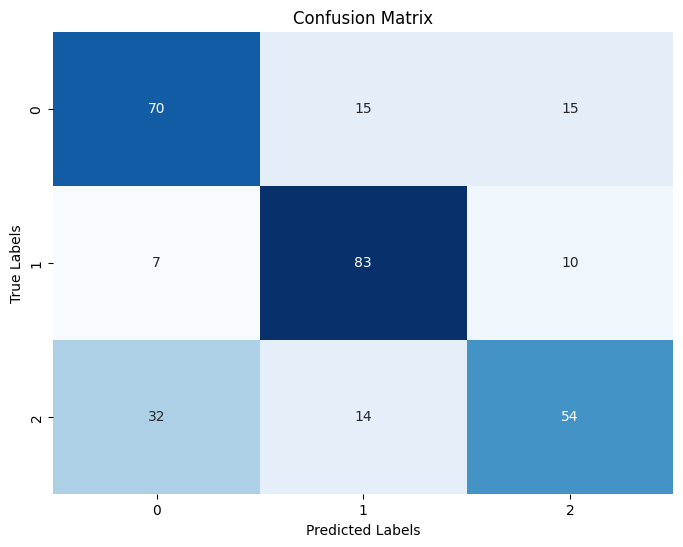

In [68]:
cross_validation(knn_model,X_cpc2,y_cpc2)

## KNN 75% TRAIN, 25% TEST

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc2, y_cpc2, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 225
Jumlah data test: 75


Class: A
Sensitivity: 0.78
Specificity: 0.81
Accuracy: 0.8

Class: D
Sensitivity: 0.91
Specificity: 0.83
Accuracy: 0.85

Class: E
Sensitivity: 0.52
Specificity: 0.96
Accuracy: 0.81

Average Sensitivity: 0.74
Average Specificity: 0.87
Average Accuracy: 0.82
Average F1 Score: 0.73


Classification Report:
              precision    recall  f1-score   support

           A       0.70      0.78      0.74        27
           D       0.70      0.91      0.79        23
           E       0.87      0.52      0.65        25

    accuracy                           0.73        75
   macro avg       0.76      0.74      0.73        75
weighted avg       0.76      0.73      0.72        75



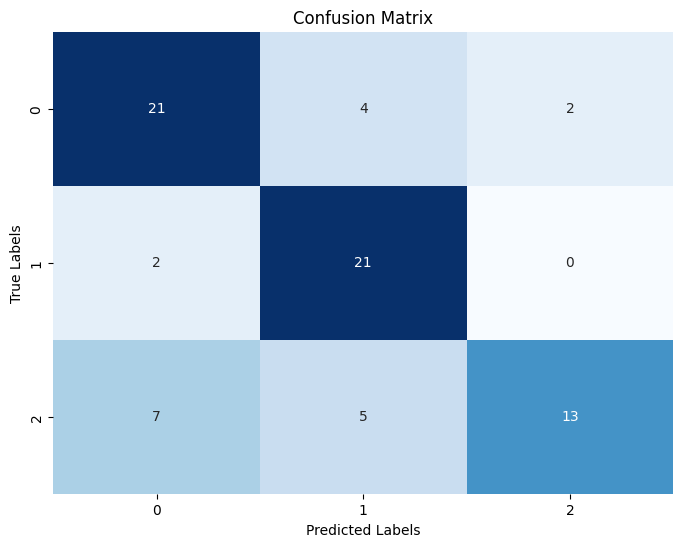

In [70]:
train_test(knn_model, X_test, y_test)

## KNN 50% TRAIN, 25% VALIDATION, 25% TEST


In [71]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc2, y_cpc2, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: A
Sensitivity: 0.61
Specificity: 0.79
Accuracy: 0.72

Class: D
Sensitivity: 0.92
Specificity: 0.78
Accuracy: 0.83

Class: E
Sensitivity: 0.43
Specificity: 0.93
Accuracy: 0.79

Average Sensitivity: 0.65
Average Specificity: 0.83
Average Accuracy: 0.78
Average F1 Score: 0.64


Classification Report:
              precision    recall  f1-score   support

           A       0.63      0.61      0.62        28
           D       0.69      0.92      0.79        26
           E       0.69      0.43      0.53        21

    accuracy                           0.67        75
   macro avg       0.67      0.65      0.64        75
weighted avg       0.67      0.67      0.65        75



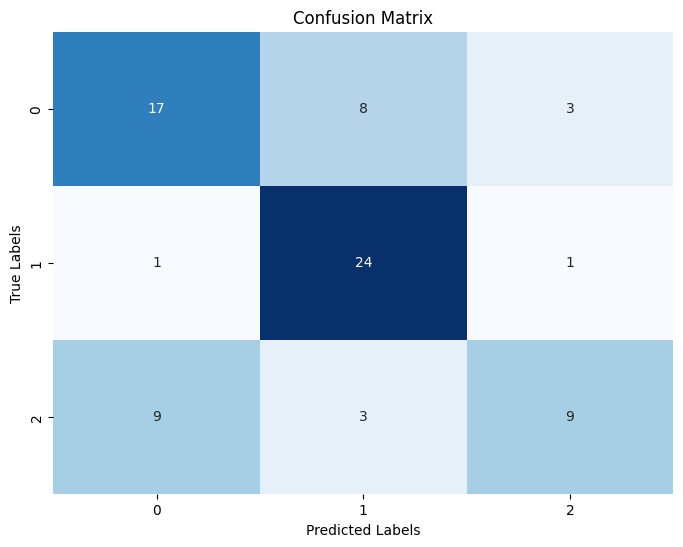

In [72]:
train_validation_test(knn_model, X_validation, y_validation)

#CPC3

In [73]:
file_cpc3 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPC1-5/CPC3.xlsx'
cpc3 = pd.read_excel(file_cpc3)
cpc3


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.448457,0.220860,0.143938,0.104903,0.081841,B
1,0.448288,0.221315,0.144335,0.104964,0.081099,B
2,0.448916,0.221049,0.143741,0.105198,0.081096,B
3,0.449600,0.221141,0.144107,0.104930,0.080222,B
4,0.451886,0.221594,0.143987,0.103718,0.078816,B
...,...,...,...,...,...,...
295,0.444264,0.220282,0.144946,0.106833,0.083676,E
296,0.445045,0.220472,0.144977,0.106466,0.083040,E
297,0.445374,0.220198,0.145034,0.106326,0.083069,E
298,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [74]:
#Check class
jumlah_kelas = cpc3['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpc3['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 3
Jumlah data per kelas:


kelas
B    100
C    100
E    100
Name: count, dtype: int64

In [75]:
X_cpc3 = cpc3[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpc3 = cpc3['kelas']

## SVM 10FOLD-CV

Class: B
Sensitivity: 0.59
Specificity: 0.87
Accuracy: 0.78

Class: C
Sensitivity: 0.93
Specificity: 0.84
Accuracy: 0.87

Class: E
Sensitivity: 0.59
Specificity: 0.85
Accuracy: 0.76

Average Sensitivity: 0.7
Average Specificity: 0.85
Average Accuracy: 0.8
Average F1 Score: 0.7


              precision    recall  f1-score   support

           B       0.69      0.59      0.64       100
           C       0.74      0.93      0.82       100
           E       0.66      0.59      0.62       100

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



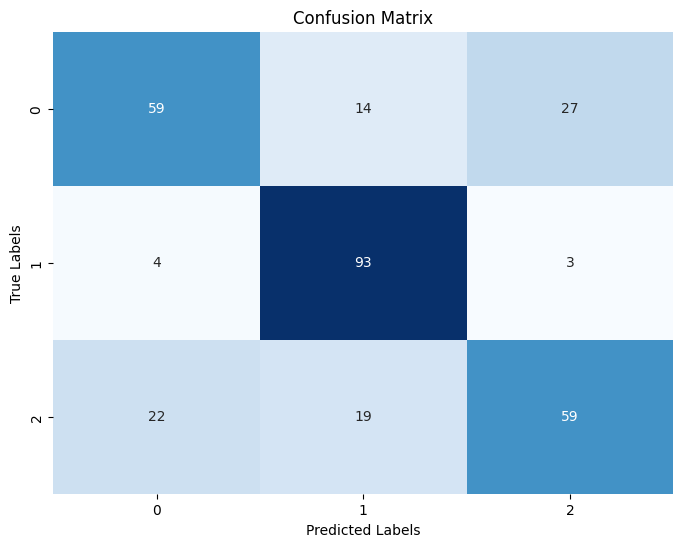

In [76]:
cross_validation(svm_model,X_cpc3,y_cpc3)

## SVM 75% TRAIN, 25% TEST

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc3, y_cpc3, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 225
Jumlah data test: 75


Class: B
Sensitivity: 0.67
Specificity: 0.88
Accuracy: 0.8

Class: C
Sensitivity: 0.96
Specificity: 0.81
Accuracy: 0.85

Class: E
Sensitivity: 0.6
Specificity: 0.92
Accuracy: 0.81

Average Sensitivity: 0.74
Average Specificity: 0.87
Average Accuracy: 0.82
Average F1 Score: 0.73


Classification Report:
              precision    recall  f1-score   support

           B       0.75      0.67      0.71        27
           C       0.69      0.96      0.80        23
           E       0.79      0.60      0.68        25

    accuracy                           0.73        75
   macro avg       0.74      0.74      0.73        75
weighted avg       0.74      0.73      0.73        75



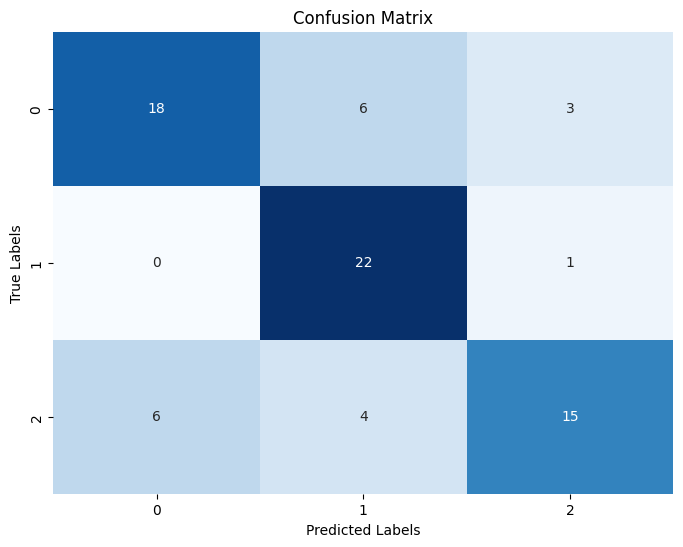

In [78]:
train_test(svm_model, X_test, y_test)


## SVM 50% TRAIN, 25% VALIDATION, 25% TEST


In [79]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc3, y_cpc3, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: B
Sensitivity: 0.79
Specificity: 0.89
Accuracy: 0.85

Class: C
Sensitivity: 0.96
Specificity: 0.82
Accuracy: 0.87

Class: E
Sensitivity: 0.52
Specificity: 0.94
Accuracy: 0.83

Average Sensitivity: 0.76
Average Specificity: 0.88
Average Accuracy: 0.85
Average F1 Score: 0.75


Classification Report:
              precision    recall  f1-score   support

           B       0.81      0.79      0.80        28
           C       0.74      0.96      0.83        26
           E       0.79      0.52      0.63        21

    accuracy                           0.77        75
   macro avg       0.78      0.76      0.75        75
weighted avg       0.78      0.77      0.76        75



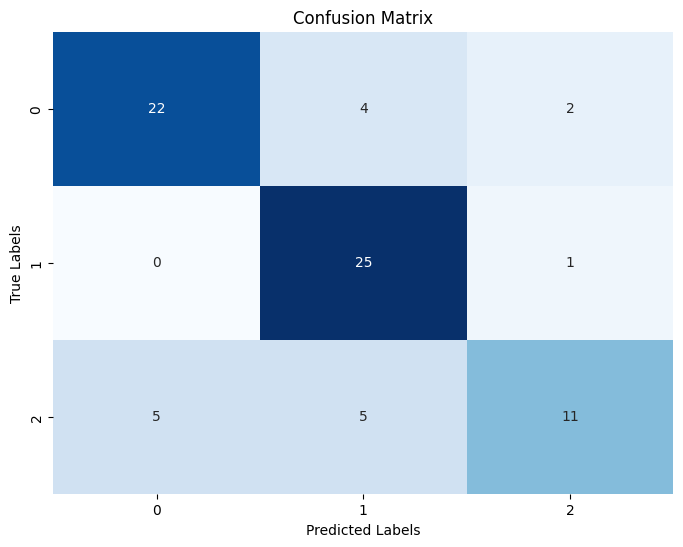

In [80]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: B
Sensitivity: 0.69
Specificity: 0.81
Accuracy: 0.77

Class: C
Sensitivity: 0.86
Specificity: 0.9
Accuracy: 0.88

Class: E
Sensitivity: 0.61
Specificity: 0.88
Accuracy: 0.79

Average Sensitivity: 0.72
Average Specificity: 0.86
Average Accuracy: 0.81
Average F1 Score: 0.72


              precision    recall  f1-score   support

           B       0.64      0.69      0.67       100
           C       0.80      0.86      0.83       100
           E       0.71      0.61      0.66       100

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



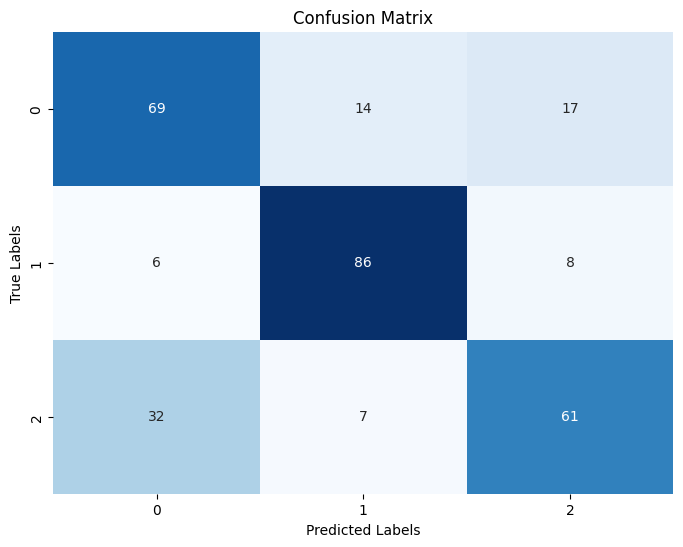

In [81]:
cross_validation(knn_model,X_cpc3,y_cpc3)

## KNN 75% TRAIN, 25% TEST

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc3, y_cpc3, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 225
Jumlah data test: 75


Class: B
Sensitivity: 0.63
Specificity: 0.77
Accuracy: 0.72

Class: C
Sensitivity: 0.96
Specificity: 0.81
Accuracy: 0.85

Class: E
Sensitivity: 0.44
Specificity: 0.92
Accuracy: 0.76

Average Sensitivity: 0.68
Average Specificity: 0.83
Average Accuracy: 0.78
Average F1 Score: 0.66


Classification Report:
              precision    recall  f1-score   support

           B       0.61      0.63      0.62        27
           C       0.69      0.96      0.80        23
           E       0.73      0.44      0.55        25

    accuracy                           0.67        75
   macro avg       0.68      0.68      0.66        75
weighted avg       0.67      0.67      0.65        75



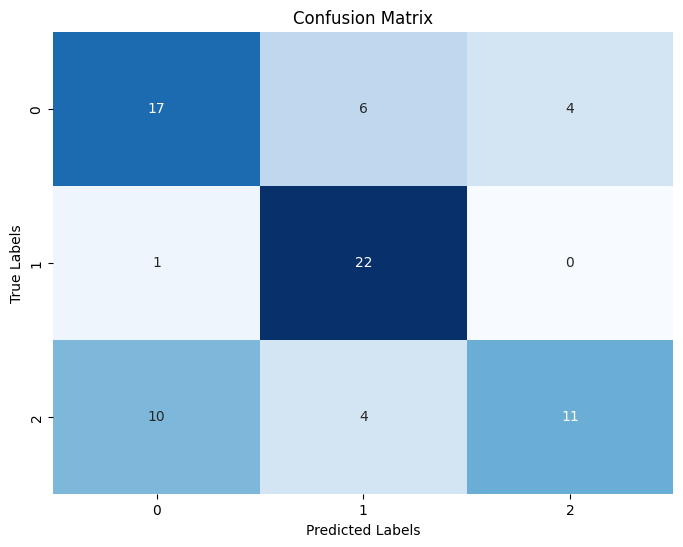

In [83]:
train_test(knn_model, X_test, y_test)

## KNN 50% TRAIN, 25% VALIDATION, 25% TEST


In [84]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc3, y_cpc3, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: B
Sensitivity: 0.79
Specificity: 0.74
Accuracy: 0.76

Class: C
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88

Class: E
Sensitivity: 0.43
Specificity: 0.94
Accuracy: 0.8

Average Sensitivity: 0.7
Average Specificity: 0.86
Average Accuracy: 0.81
Average F1 Score: 0.7


Classification Report:
              precision    recall  f1-score   support

           B       0.65      0.79      0.71        28
           C       0.79      0.88      0.84        26
           E       0.75      0.43      0.55        21

    accuracy                           0.72        75
   macro avg       0.73      0.70      0.70        75
weighted avg       0.73      0.72      0.71        75



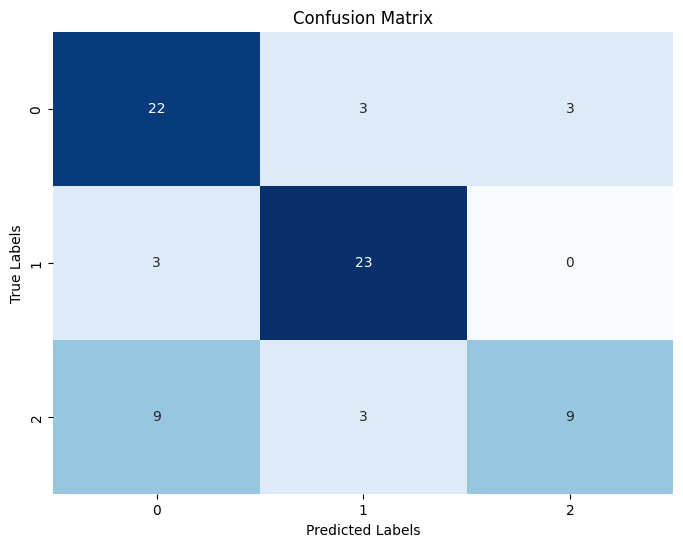

In [85]:
train_validation_test(knn_model, X_validation, y_validation)

#CPC4

In [86]:
file_cpc4 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPC1-5/CPC4.xlsx'
cpc4 = pd.read_excel(file_cpc4)
cpc4


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.448457,0.220860,0.143938,0.104903,0.081841,B
1,0.448288,0.221315,0.144335,0.104964,0.081099,B
2,0.448916,0.221049,0.143741,0.105198,0.081096,B
3,0.449600,0.221141,0.144107,0.104930,0.080222,B
4,0.451886,0.221594,0.143987,0.103718,0.078816,B
...,...,...,...,...,...,...
295,0.444264,0.220282,0.144946,0.106833,0.083676,E
296,0.445045,0.220472,0.144977,0.106466,0.083040,E
297,0.445374,0.220198,0.145034,0.106326,0.083069,E
298,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [87]:
#Check class
jumlah_kelas = cpc4['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpc4['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 3
Jumlah data per kelas:


kelas
B    100
D    100
E    100
Name: count, dtype: int64

In [88]:
X_cpc4 = cpc4[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpc4 = cpc4['kelas']

## SVM 10FOLD-CV

Class: B
Sensitivity: 0.59
Specificity: 0.88
Accuracy: 0.78

Class: D
Sensitivity: 0.85
Specificity: 0.85
Accuracy: 0.85

Class: E
Sensitivity: 0.61
Specificity: 0.8
Accuracy: 0.74

Average Sensitivity: 0.68
Average Specificity: 0.84
Average Accuracy: 0.79
Average F1 Score: 0.68


              precision    recall  f1-score   support

           B       0.70      0.59      0.64       100
           D       0.74      0.85      0.79       100
           E       0.60      0.61      0.61       100

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



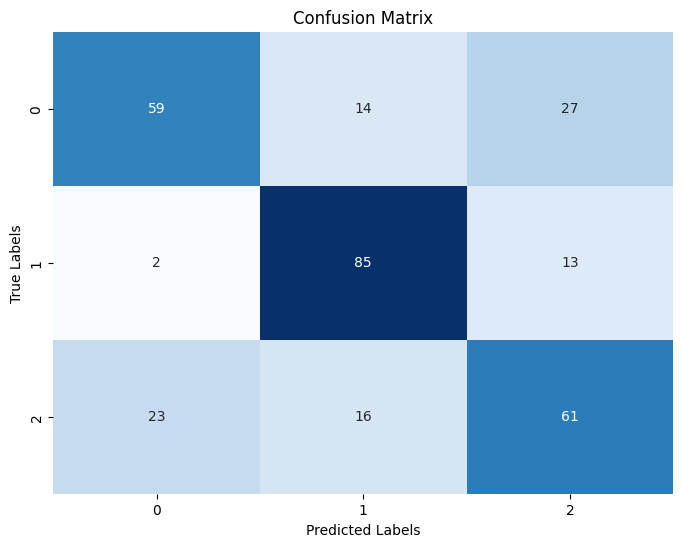

In [89]:
cross_validation(svm_model,X_cpc4,y_cpc4)

##SVM 75% TRAIN, 25% TEST

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc4, y_cpc4, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 225
Jumlah data test: 75


Class: B
Sensitivity: 0.67
Specificity: 0.88
Accuracy: 0.8

Class: D
Sensitivity: 0.91
Specificity: 0.79
Accuracy: 0.83

Class: E
Sensitivity: 0.6
Specificity: 0.92
Accuracy: 0.81

Average Sensitivity: 0.73
Average Specificity: 0.86
Average Accuracy: 0.81
Average F1 Score: 0.72


Classification Report:
              precision    recall  f1-score   support

           B       0.75      0.67      0.71        27
           D       0.66      0.91      0.76        23
           E       0.79      0.60      0.68        25

    accuracy                           0.72        75
   macro avg       0.73      0.73      0.72        75
weighted avg       0.73      0.72      0.72        75



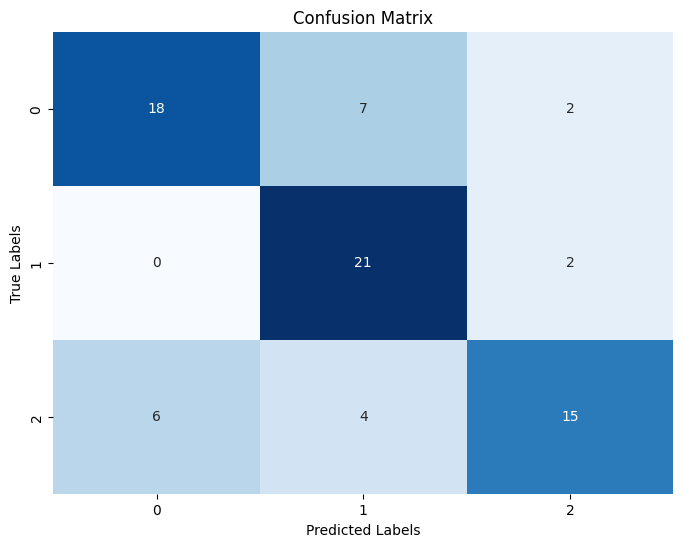

In [91]:
train_test(svm_model, X_test, y_test)

## SVM 50% TRAIN, 25% VALIDATION, 25% TEST


In [92]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc4, y_cpc4, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: B
Sensitivity: 0.79
Specificity: 0.89
Accuracy: 0.85

Class: D
Sensitivity: 0.96
Specificity: 0.8
Accuracy: 0.85

Class: E
Sensitivity: 0.48
Specificity: 0.94
Accuracy: 0.81

Average Sensitivity: 0.74
Average Specificity: 0.88
Average Accuracy: 0.84
Average F1 Score: 0.74


Classification Report:
              precision    recall  f1-score   support

           B       0.81      0.79      0.80        28
           D       0.71      0.96      0.82        26
           E       0.77      0.48      0.59        21

    accuracy                           0.76        75
   macro avg       0.77      0.74      0.74        75
weighted avg       0.77      0.76      0.75        75



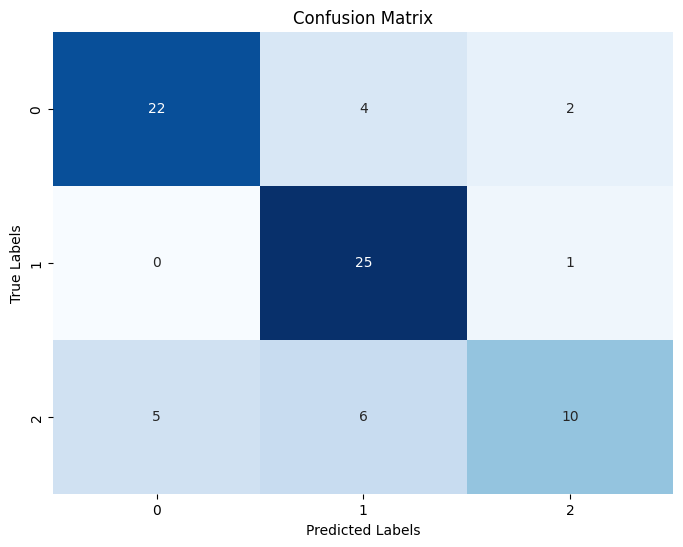

In [93]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: B
Sensitivity: 0.71
Specificity: 0.82
Accuracy: 0.79

Class: D
Sensitivity: 0.83
Specificity: 0.88
Accuracy: 0.86

Class: E
Sensitivity: 0.55
Specificity: 0.84
Accuracy: 0.74

Average Sensitivity: 0.7
Average Specificity: 0.85
Average Accuracy: 0.8
Average F1 Score: 0.69


              precision    recall  f1-score   support

           B       0.67      0.71      0.69       100
           D       0.78      0.83      0.80       100
           E       0.63      0.55      0.59       100

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.69      0.70      0.69       300



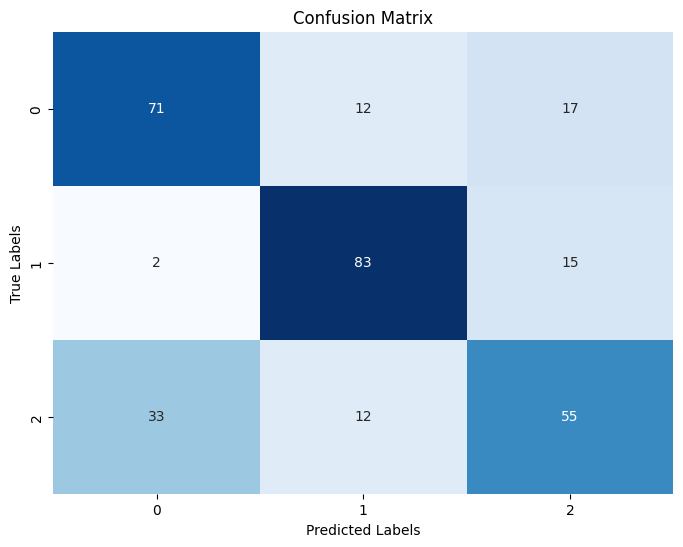

In [94]:
cross_validation(knn_model,X_cpc4,y_cpc4)

## KNN 75% TRAIN, 25% TEST

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc4, y_cpc4, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 225
Jumlah data test: 75


Class: B
Sensitivity: 0.63
Specificity: 0.77
Accuracy: 0.72

Class: D
Sensitivity: 0.91
Specificity: 0.77
Accuracy: 0.81

Class: E
Sensitivity: 0.36
Specificity: 0.9
Accuracy: 0.72

Average Sensitivity: 0.63
Average Specificity: 0.81
Average Accuracy: 0.75
Average F1 Score: 0.61


Classification Report:
              precision    recall  f1-score   support

           B       0.61      0.63      0.62        27
           D       0.64      0.91      0.75        23
           E       0.64      0.36      0.46        25

    accuracy                           0.63        75
   macro avg       0.63      0.63      0.61        75
weighted avg       0.63      0.63      0.61        75



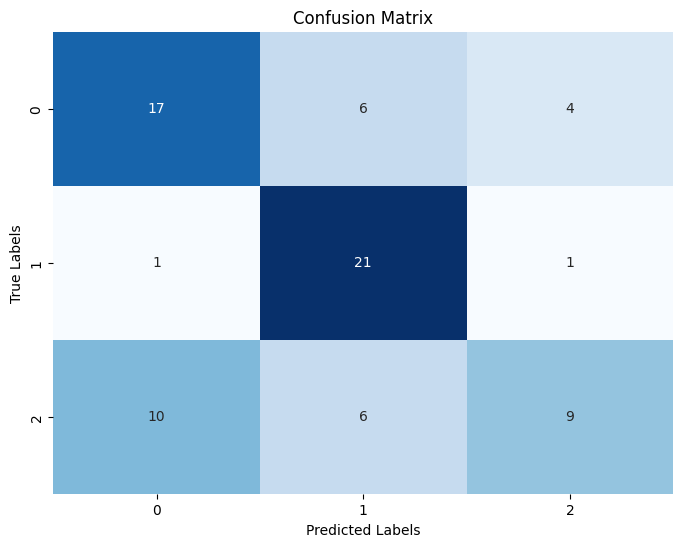

In [96]:
train_test(knn_model, X_test, y_test)

## KNN 50% TRAIN, 25% VALIDATION, 25% TEST


In [97]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc4, y_cpc4, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 150
Jumlah data test: 75
Jumlah data validation: 75


Class: B
Sensitivity: 0.79
Specificity: 0.81
Accuracy: 0.8

Class: D
Sensitivity: 0.88
Specificity: 0.9
Accuracy: 0.89

Class: E
Sensitivity: 0.48
Specificity: 0.89
Accuracy: 0.77

Average Sensitivity: 0.72
Average Specificity: 0.87
Average Accuracy: 0.82
Average F1 Score: 0.71


Classification Report:
              precision    recall  f1-score   support

           B       0.71      0.79      0.75        28
           D       0.82      0.88      0.85        26
           E       0.62      0.48      0.54        21

    accuracy                           0.73        75
   macro avg       0.72      0.72      0.71        75
weighted avg       0.72      0.73      0.73        75



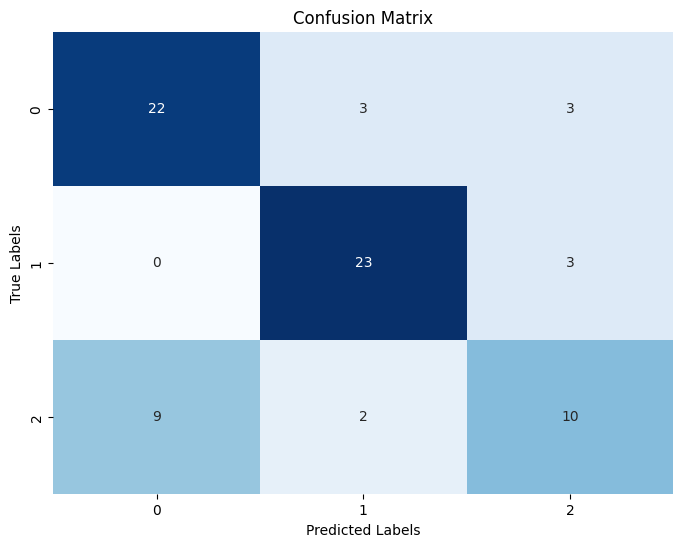

In [98]:
train_validation_test(knn_model, X_validation, y_validation)

# CPC5

In [99]:
file_cpc5 = '/content/drive/MyDrive/TUGAS SLO/MINI_PROJECT1/CPC1-5/CPC5.xlsx'
cpc5 = pd.read_excel(file_cpc5)
cpc5


,powLv1,powLv2,powLv3,powLv4,powLv5,kelas
0,0.446692,0.220117,0.144672,0.106003,0.082516,A
1,0.442455,0.219658,0.145039,0.107494,0.085354,A
2,0.446993,0.220535,0.144443,0.105565,0.082465,A
3,0.457090,0.221898,0.141954,0.101666,0.077392,A
4,0.447407,0.220674,0.143812,0.105975,0.082134,A
...,...,...,...,...,...,...
495,0.444264,0.220282,0.144946,0.106833,0.083676,E
496,0.445045,0.220472,0.144977,0.106466,0.083040,E
497,0.445374,0.220198,0.145034,0.106326,0.083069,E
498,0.449798,0.221450,0.143373,0.105009,0.080371,E


In [100]:
#Check class
jumlah_kelas = cpc5['kelas'].nunique()
print("Jumlah kelas:", jumlah_kelas)

jumlah_data_per_kelas = cpc5['kelas'].value_counts()
print("Jumlah data per kelas:")
jumlah_data_per_kelas

Jumlah kelas: 3
Jumlah data per kelas:


kelas
A    200
C    200
E    100
Name: count, dtype: int64

In [101]:
X_cpc5 = cpc5[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y_cpc5 = cpc5['kelas']

## SVM 10FOLD-CV

Class: A
Sensitivity: 0.68
Specificity: 0.78
Accuracy: 0.74

Class: C
Sensitivity: 0.91
Specificity: 0.81
Accuracy: 0.85

Class: E
Sensitivity: 0.31
Specificity: 0.93
Accuracy: 0.81

Average Sensitivity: 0.63
Average Specificity: 0.84
Average Accuracy: 0.8
Average F1 Score: 0.63


              precision    recall  f1-score   support

           A       0.67      0.68      0.67       200
           C       0.76      0.91      0.83       200
           E       0.53      0.31      0.39       100

    accuracy                           0.70       500
   macro avg       0.65      0.63      0.63       500
weighted avg       0.68      0.70      0.68       500



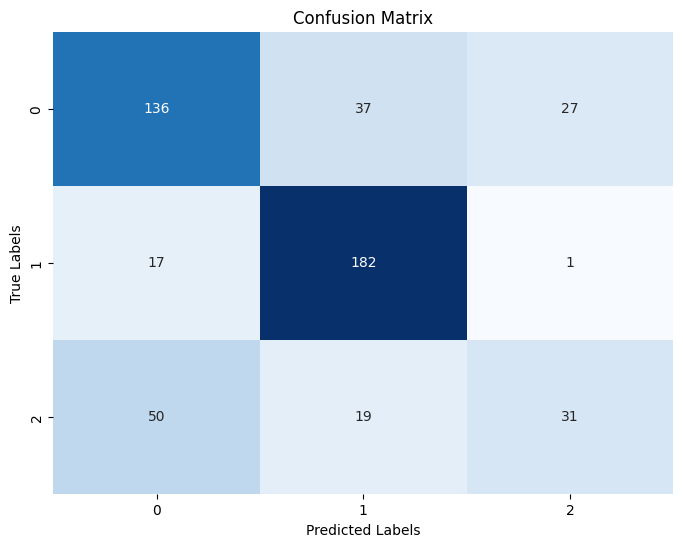

In [102]:
cross_validation(svm_model,X_cpc5,y_cpc5)

##SVM 75% TRAIN, 25% TEST

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc5, y_cpc5, test_size=0.25, random_state=42)
svm_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 375
Jumlah data test: 125


Class: A
Sensitivity: 0.69
Specificity: 0.69
Accuracy: 0.69

Class: C
Sensitivity: 0.81
Specificity: 0.81
Accuracy: 0.81

Class: E
Sensitivity: 0.19
Specificity: 0.91
Accuracy: 0.75

Average Sensitivity: 0.56
Average Specificity: 0.8
Average Accuracy: 0.75
Average F1 Score: 0.55


Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.69      0.64        51
           C       0.72      0.81      0.76        47
           E       0.36      0.19      0.24        27

    accuracy                           0.62       125
   macro avg       0.56      0.56      0.55       125
weighted avg       0.59      0.62      0.60       125



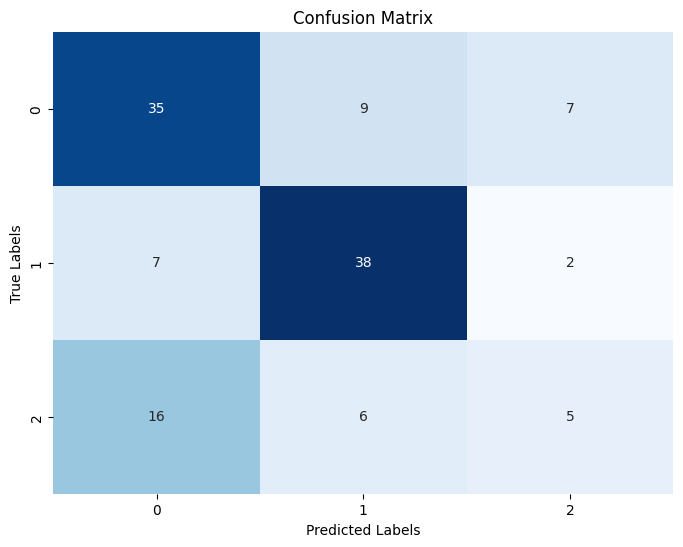

In [104]:
train_test(svm_model, X_test, y_test)

## SVM 50% TRAIN, 25% VALIDATION, 25% TEST


In [105]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc5, y_cpc5, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

svm_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 250
Jumlah data test: 125
Jumlah data validation: 125


Class: A
Sensitivity: 0.66
Specificity: 0.85
Accuracy: 0.76

Class: C
Sensitivity: 0.89
Specificity: 0.88
Accuracy: 0.88

Class: E
Sensitivity: 0.52
Specificity: 0.86
Accuracy: 0.8

Average Sensitivity: 0.69
Average Specificity: 0.86
Average Accuracy: 0.81
Average F1 Score: 0.68


Classification Report:
              precision    recall  f1-score   support

           A       0.80      0.66      0.72        59
           C       0.80      0.89      0.84        45
           E       0.42      0.52      0.47        21

    accuracy                           0.72       125
   macro avg       0.67      0.69      0.68       125
weighted avg       0.73      0.72      0.72       125



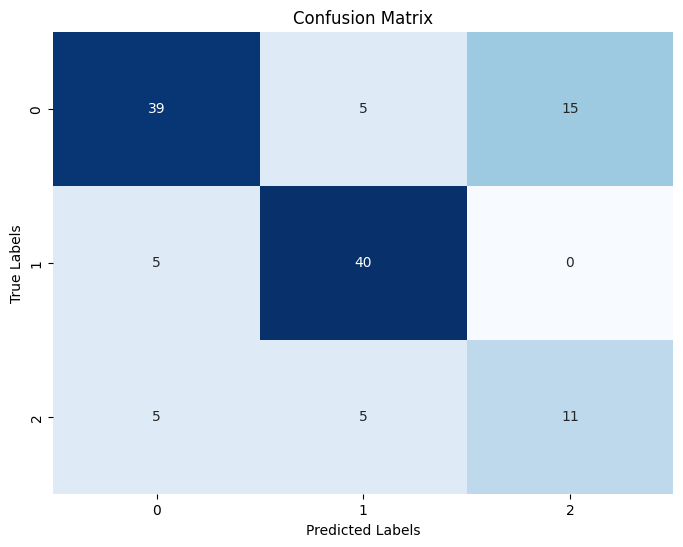

In [106]:
train_validation_test(svm_model, X_validation, y_validation)

## KNN 10FOLD-CV

Class: A
Sensitivity: 0.76
Specificity: 0.77
Accuracy: 0.77

Class: C
Sensitivity: 0.84
Specificity: 0.84
Accuracy: 0.84

Class: E
Sensitivity: 0.38
Specificity: 0.93
Accuracy: 0.82

Average Sensitivity: 0.66
Average Specificity: 0.85
Average Accuracy: 0.81
Average F1 Score: 0.66


              precision    recall  f1-score   support

           A       0.69      0.76      0.72       200
           C       0.78      0.84      0.81       200
           E       0.58      0.38      0.46       100

    accuracy                           0.72       500
   macro avg       0.69      0.66      0.66       500
weighted avg       0.71      0.72      0.71       500



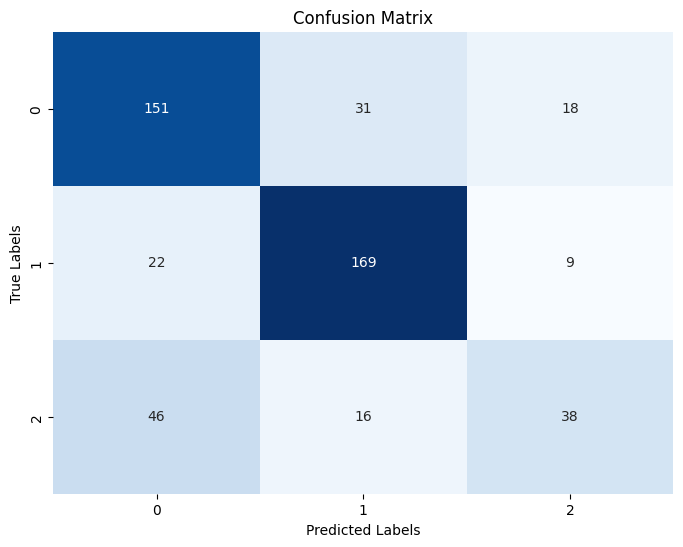

In [107]:
cross_validation(knn_model,X_cpc5,y_cpc5)

## KNN 75% TRAIN, 25% TEST

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_cpc5, y_cpc5, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 375
Jumlah data test: 125


Class: A
Sensitivity: 0.73
Specificity: 0.72
Accuracy: 0.72

Class: C
Sensitivity: 0.7
Specificity: 0.82
Accuracy: 0.78

Class: E
Sensitivity: 0.3
Specificity: 0.88
Accuracy: 0.75

Average Sensitivity: 0.57
Average Specificity: 0.8
Average Accuracy: 0.75
Average F1 Score: 0.57


Classification Report:
              precision    recall  f1-score   support

           A       0.64      0.73      0.68        51
           C       0.70      0.70      0.70        47
           E       0.40      0.30      0.34        27

    accuracy                           0.62       125
   macro avg       0.58      0.57      0.57       125
weighted avg       0.61      0.62      0.61       125



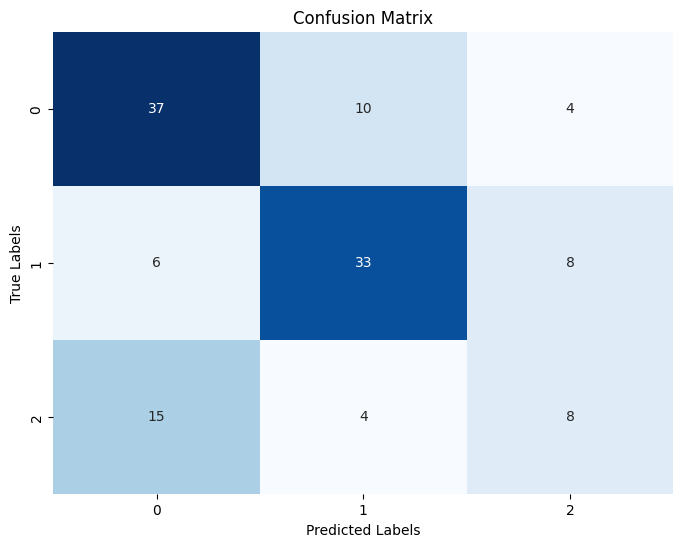

In [109]:
train_test(knn_model, X_test, y_test)

## KNN 50% TRAIN, 25% VALIDATION, 25% TEST


In [110]:
# Split the data into training (50%) and the rest (50%)
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_cpc5, y_cpc5, test_size=0.5, random_state=42)

# Split the rest into validation (50%) and testing (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

knn_model.fit(X_train_rest, y_train_rest)

# Menampilkan jumlah data train dan test
print("Jumlah data train:", len(X_train_rest))
print("Jumlah data test:", len(X_test))
print("Jumlah data validation:", len(X_validation))

Jumlah data train: 250
Jumlah data test: 125
Jumlah data validation: 125


Class: A
Sensitivity: 0.86
Specificity: 0.74
Accuracy: 0.8

Class: C
Sensitivity: 0.82
Specificity: 0.9
Accuracy: 0.87

Class: E
Sensitivity: 0.29
Specificity: 0.94
Accuracy: 0.83

Average Sensitivity: 0.66
Average Specificity: 0.86
Average Accuracy: 0.83
Average F1 Score: 0.66


Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.86      0.80        59
           C       0.82      0.82      0.82        45
           E       0.50      0.29      0.36        21

    accuracy                           0.75       125
   macro avg       0.69      0.66      0.66       125
weighted avg       0.73      0.75      0.74       125



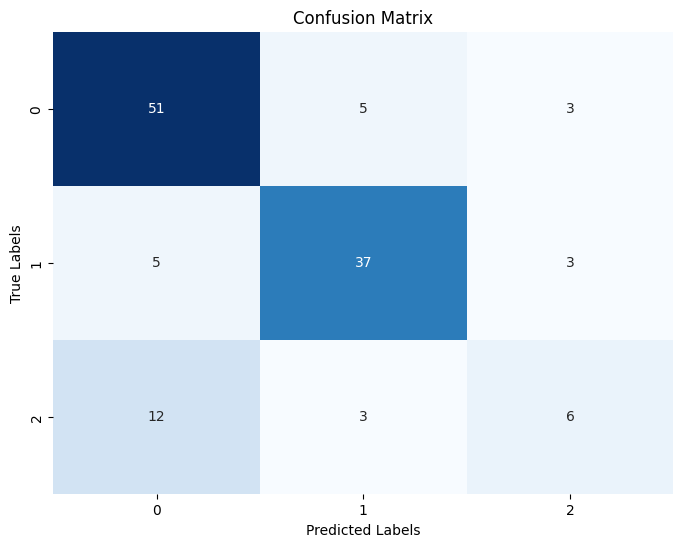

In [111]:
train_validation_test(knn_model, X_validation, y_validation)